In [6]:
!pip install ultralytics


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# **Libraries**

In [7]:
import os
import shutil
from rich.console import Console
from rich.tree import Tree
from rich.table import Table
from rich.panel import Panel
from rich.progress import track
from rich.markdown import Markdown
from rich.columns import Columns
from rich.progress import Progress
from collections import Counter
import random
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO
import numpy as np

# **Dataset Preview**

Reading class labels from 
e:\AgriBot\Fruit-and-vegetable-image-recognition\complete_fruit_veg_dataset\label_mapping.txt

Analyzing Dataset Structure...

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 📁 complete_fruit_veg_dataset                                                                                   │
│ ├── 📁 train                                                                                                    │
│ │   ├── 📁 class_0 (apple) (52 files)                                                                           │
│ │   │   └── 📄 ... (52 files)                                                                                   │
│ │   ├── 📁 class_1 (banana) (55 files)                                                                          │
│ │   │   └── 📄 ... (55 files)                                                                                   │
│ │   ├── 📁 class_10 (cucumber) (69 files)                                                                       │
│ │   │   └── 📄 ... (69 files)                                                                                   │
│ │   ├── 📁 class_11 (eggplant) (70 files)                                                                       │
│ │   │   └── 📄 ... (70 files)                                                                                   │
│ │   ├── 📁 class_12 (garlic) (76 files)                                                                         │
│ │   │   └── 📄 ... (76 files)                                                                                   │
│ │   ├── 📁 class_13 (ginger) (53 files)                                                                         │
│ │   │   └── 📄 ... (53 files)                                                                                   │
│ │   ├── 📁 class_14 (grapes) (78 files)                                                                         │
│ │   │   └── 📄 ... (78 files)                                                                                   │
│ │   ├── 📁 class_15 (jalepeno) (73 files)                                                                       │
│ │   │   └── 📄 ... (73 files)                                                                                   │
│ │   ├── 📁 class_16 (kiwi) (73 files)                                                                           │
│ │   │   └── 📄 ... (73 files)                                                                                   │
│ │   ├── 📁 class_17 (lemon) (64 files)                                                                          │
│ │   │   └── 📄 ... (64 files)                                                                                   │
│ │   ├── 📁 class_18 (lettuce) (77 files)                                                                        │
│ │   │   └── 📄 ... (77 files)                                                                                   │
│ │   ├── 📁 class_19 (mango) (68 files)                                                                          │
│ │   │   └── 📄 ... (68 files)                                                                                   │
│ │   ├── 📁 class_2 (beetroot) (73 files)                                                                        │
│ │   │   └── 📄 ... (73 files)                                                                                   │
│ │   ├── 📁 class_20 (onion) (75 files)                                                                          │
│ │   │   └── 📄 ... (75 files)                                                                                   │
│ │   ├── 📁 class_21 (orange) (56 files)                                                                         │
│ │   │   └── 📄 ... (56 files)                                                                                   │
│ │   ├── 📁 class_22 (paprika) (69 files)                                                                        │
│ │   │   └── 📄 ... (69 files)                                                           

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│     Dataset Structure Summary                                                                                   │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓                                                                              │
│ ┃ Metric           ┃ Value       ┃                                                                              │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩                                                                              │
│ │ Total Classes    │ 36          │                                                                              │
│ │ Total Files      │ 3115        │                                                                              │
│ │ Training Files   │ 2492        │                                                                              │
│ │ Testing Files    │ 623         │                                                                              │
│ │ Train/Test Split │ 80.0%/20.0% │                                                                              │
│ └──────────────────┴─────────────┘                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Class Distribution Analysis

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                            Class Distribution                                                                   │
│ ┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━┓                                       │
│ ┃ Class ID ┃ Class Name    ┃ Training Samples ┃ Testing Samples ┃ Total ┃                                       │
│ ┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━┩                                       │
│ │  Class 0 │ apple         │               52 │              16 │    68 │                                       │
│ │  Class 1 │ banana        │               55 │              20 │    75 │                                       │
│ │  Class 2 │ beetroot      │               73 │              15 │    88 │                                       │
│ │  Class 3 │ bell pepper   │               75 │              15 │    90 │                                       │
│ │  Class 4 │ cabbage       │               74 │              18 │    92 │                                       │
│ │  Class 5 │ capsicum      │               72 │              17 │    89 │                                       │
│ │  Class 6 │ carrot        │               67 │              15 │    82 │                                       │
│ │  Class 7 │ cauliflower   │               65 │              14 │    79 │                                       │
│ │  Class 8 │ chilli pepper │               68 │              19 │    87 │                                       │
│ │  Class 9 │ corn          │               66 │              21 │    87 │                                       │
│ │ Class 10 │ cucumber      │               69 │              25 │    94 │                                       │
│ │ Class 11 │ eggplant      │               70 │              14 │    84 │                                       │
│ │ Class 12 │ garlic        │               76 │              16 │    92 │                                       │
│ │ Class 13 │ ginger        │               53 │              15 │    68 │                                       │
│ │ Class 14 │ grapes        │               78 │              22 │   100 │                                       │
│ │ Class 15 │ jalepeno      │               73 │              15 │    88 │                                       │
│ │ Class 16 │ kiwi          │               73 │              15 │    88 │                                       │
│ │ Class 17 │ lemon         │               64 │              18 │    82 │                                       │
│ │ Class 18 │ lettuce       │               77 │              20 │    97 │                                       │
│ │ Class 19 │ mango         │               68 │              18 │    86 │                                       │
│ │ Class 20 │ onion         │               75 │              19 │    94 │                                       │
│ │ Class 21 │ orange        │               56 │              13 │    69 │                                       │
│ │ Class 22 │ paprika       │               69 │              14 │    83 │                                       │
│ │ Class 23 │ pear          │               73 │              16 │    89 │                                       │
│ │ Class 24 │ peas          │               82 │              18 │   100 │                                       │
│ │ Class 25 │ pineapple     │               80 │              19 │    99 │                                       │
│ │ Class 26 │ pomegranate   │               68 │              11 │    79 │                                       │
│ │ Class 27 │ potato        │               60 │              17 │    77 │                                       │
│ │ Class 28 │ raddish       │               63 │              18 │    81 │                                       │
│ │ Class 29 │ soy beans     │               78 │       

Class distribution visualization saved as: class_distribution_explorer.png

──────────────────────────────────────────── Dataset Overview Complete ────────────────────────────────────────────

Summary                                                      

 • The dataset contains 36 classes of fruits and vegetables                                                        
 • Total of 3115 image files across train and test splits                                                          
 • Training set: 2492 images (80.0%)                                                                               
 • Testing set: 623 images (20.0%)                                                                                 
 • Dataset location: e:\AgriBot\Fruit-and-vegetable-image-recognition\complete_fruit_veg_dataset

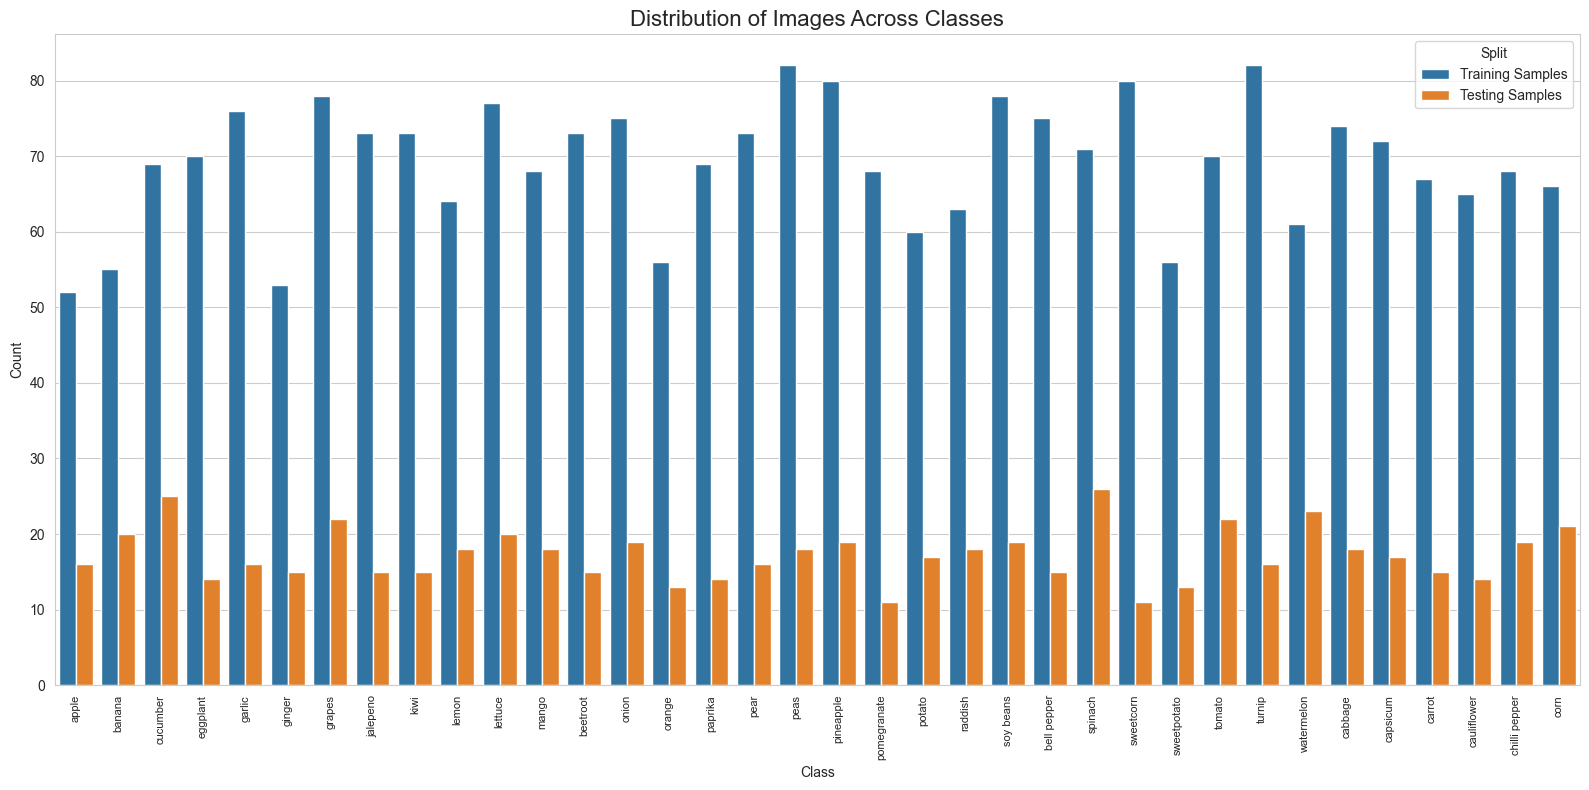

In [8]:
console = Console()

dataset_dir = os.path.join(os.getcwd(), "complete_fruit_veg_dataset")
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")
mapping_file = os.path.join(dataset_dir, "label_mapping.txt")

class_names = {}
if os.path.exists(mapping_file):
    console.print(f"[green]Reading class labels from {mapping_file}[/]")
    with open(mapping_file, 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                parts = line.split(':')
                if len(parts) == 2:
                    class_id = parts[0].strip()
                    class_name = parts[1].strip()
                    class_names[class_id] = class_name
else:
    console.print(f"[yellow]Warning: Label mapping file not found at {mapping_file}[/]")

def get_class_name(class_id):
    if class_id in class_names:
        return class_names[class_id]
    else:
        return f"Class {class_id}"

total_files = 0
total_classes = 0
train_files = 0
test_files = 0
class_counts = {}
class_file_sizes = {}

console.print("[bold blue]Analyzing Dataset Structure...[/]", justify="center")
console.print()

def add_directory_to_tree(path, tree):
    global total_files, total_classes
    directories = []
    files = []
    
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            directories.append(item)
            if item.startswith("class_"):
                total_classes += 1
        else:
            files.append(item)
            total_files += 1
    
    for dirname in sorted(directories):
        dir_path = os.path.join(path, dirname)
        dir_files = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
        
        if dirname.startswith("class_"):
            class_id = dirname.split("_")[1]
            if class_id not in class_counts:
                class_counts[class_id] = {"train": 0, "test": 0}
            
            if "train" in path:
                class_counts[class_id]["train"] += dir_files
            else:
                class_counts[class_id]["test"] += dir_files
            
            # Use actual class name in the tree
            class_display_name = get_class_name(class_id)
            branch = tree.add(f"📁 [bold cyan]{dirname} ({class_display_name})[/] ({dir_files} files)")
        else:
            branch = tree.add(f"📁 [bold cyan]{dirname}[/] ({dir_files} files)")
            
        add_directory_to_tree(os.path.join(path, dirname), branch)
    
    if len(files) <= 10:
        for filename in sorted(files):
            tree.add(f"📄 {filename}")
    else:
        tree.add(f"📄 ... ({len(files)} files)")

root = Tree("[bold green]📁 complete_fruit_veg_dataset[/]")

if os.path.exists(train_dir):
    train_branch = root.add("[bold yellow]📁 train[/]")
    add_directory_to_tree(train_dir, train_branch)
    train_files = sum(len(files) for _, _, files in os.walk(train_dir))

if os.path.exists(test_dir):
    test_branch = root.add("[bold yellow]📁 test[/]")
    add_directory_to_tree(test_dir, test_branch)
    test_files = sum(len(files) for _, _, files in os.walk(test_dir))

console.print(Panel(root))
console.print()

table = Table(title="Dataset Structure Summary")
table.add_column("Metric", style="cyan")
table.add_column("Value", style="green")

total_classes_found = len(class_counts)
table.add_row("Total Classes", str(total_classes_found))
table.add_row("Total Files", str(total_files))
table.add_row("Training Files", str(train_files))
table.add_row("Testing Files", str(test_files))
table.add_row("Train/Test Split", f"{train_files/(train_files+test_files):.1%}/{test_files/(train_files+test_files):.1%}")

console.print(Panel(table))
console.print()

console.print("[bold blue]Class Distribution Analysis[/]", justify="center")
console.print()

class_table = Table(title="Class Distribution")
class_table.add_column("Class ID", justify="right", style="cyan")
class_table.add_column("Class Name", style="green")
class_table.add_column("Training Samples", justify="right", style="yellow")
class_table.add_column("Testing Samples", justify="right", style="yellow")
class_table.add_column("Total", justify="right", style="magenta")

for class_id, counts in sorted(class_counts.items(), key=lambda x: int(x[0])):
    train_count = counts["train"]
    test_count = counts["test"]
    total = train_count + test_count
    class_name = get_class_name(class_id)
    class_table.add_row(
        f"Class {class_id}",
        class_name,
        str(train_count),
        str(test_count),
        str(total)
    )

console.print(Panel(class_table))
console.print()

df = pd.DataFrame({
    'Class': [get_class_name(k) for k in class_counts.keys()],
    'Class ID': [f"Class {k}" for k in class_counts.keys()],
    'Training Samples': [v['train'] for v in class_counts.values()],
    'Testing Samples': [v['test'] for v in class_counts.values()]
})

df_long = pd.melt(df, id_vars=['Class', 'Class ID'], var_name='Split', value_name='Count')

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(x='Class', y='Count', hue='Split', data=df_long)
plt.title('Distribution of Images Across Classes', fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.savefig("class_distribution_explorer.png", bbox_inches='tight')

console.print(f"[green]Class distribution visualization saved as: class_distribution_explorer.png[/]")
console.print()

console.rule("[bold blue]Dataset Overview Complete[/]")
console.print(Markdown(f"""
## Summary
- The dataset contains **{total_classes_found} classes** of fruits and vegetables
- Total of **{total_files} image files** across train and test splits
- Training set: **{train_files} images** ({train_files/(train_files+test_files):.1%})
- Testing set: **{test_files} images** ({test_files/(train_files+test_files):.1%})
- Dataset location: `{os.path.abspath(dataset_dir)}`
"""))

# **YOLO Directory Structure**

In [9]:
console = Console()
console.print("[bold blue]Setting up YOLO dataset structure...[/]")

dataset_dir = os.path.join(os.getcwd(), "complete_fruit_veg_dataset")
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")
yolo_dir = os.path.join(os.getcwd(), "yolo_dataset")

os.makedirs(os.path.join(yolo_dir, "images", "train"), exist_ok=True)
os.makedirs(os.path.join(yolo_dir, "images", "val"), exist_ok=True)
os.makedirs(os.path.join(yolo_dir, "labels", "train"), exist_ok=True)
os.makedirs(os.path.join(yolo_dir, "labels", "val"), exist_ok=True)

console.print("[bold green]✓ Directory structure created[/]")

Setting up YOLO dataset structure...

✓ Directory structure created

# **YOLO Annotations**

In [10]:
mapping_file = os.path.join(dataset_dir, "label_mapping.txt")
class_names = {}
class_indices = {}  # to remap class IDs to be sequential from 0

if os.path.exists(mapping_file):
    console.print(f"[green]Reading class labels from {mapping_file}[/]")
    with open(mapping_file, 'r') as f:
        for idx, line in enumerate(f):
            line = line.strip()
            if line:
                parts = line.split(':')
                if len(parts) == 2:
                    orig_class_id = parts[0].strip()
                    class_name = parts[1].strip()
                    class_names[orig_class_id] = class_name
                    class_indices[orig_class_id] = idx  # Remap to sequential indices
else:
    console.print(f"[yellow]Warning: Label mapping file not found at {mapping_file}[/]")

with open(os.path.join(yolo_dir, "data.yaml"), 'w') as f:
    f.write(f"path: {os.path.abspath(yolo_dir)}\n")
    f.write(f"train: images/train\n")
    f.write(f"val: images/val\n")
    f.write(f"nc: {len(class_names)}\n")
    
    names_str = "["
    for i in range(len(class_names)):
        for k, v in class_indices.items():
            if v == i:
                names_str += f"'{class_names[k]}', "
                break
    names_str = names_str.rstrip(', ') + "]"
    f.write(f"names: {names_str}\n")

console.print("[bold green]✓ Created YOLO configuration file[/]")

Reading class labels from 
e:\AgriBot\Fruit-and-vegetable-image-recognition\complete_fruit_veg_dataset\label_mapping.txt

✓ Created YOLO configuration file

# **Process Images and Create Bounding Boxes**

In [11]:
with Progress() as progress:
    train_task = progress.add_task("[green]Processing training images...", total=sum(len(files) for _, _, files in os.walk(train_dir)))
    
    for class_dir in os.listdir(train_dir):
        if not class_dir.startswith("class_"):
            continue
            
        class_id = class_dir.split('_')[1]
        yolo_class_id = class_indices.get(class_id, 0)  
        
        class_path = os.path.join(train_dir, class_dir)
        
        for img_file in os.listdir(class_path):
            if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
                
            unique_name = f"{class_id}_{img_file}"
            
            src_img_path = os.path.join(class_path, img_file)
            dst_img_path = os.path.join(yolo_dir, "images", "train", unique_name)
            shutil.copy2(src_img_path, dst_img_path)
            
            # Generate YOLO annotation
            # Format: <class_id> <center_x> <center_y> <width> <height>
            # All values are normalized (0-1)
            img = Image.open(src_img_path)
            
            # Create a bounding box covering ~80% of the image
            # (centered, since I don't know where the object actually is 😅)
            center_x = 0.5
            center_y = 0.5
            width = 0.8
            height = 0.8
            
            label_filename = os.path.splitext(unique_name)[0] + ".txt"
            label_path = os.path.join(yolo_dir, "labels", "train", label_filename)
            with open(label_path, 'w') as f:
                f.write(f"{yolo_class_id} {center_x} {center_y} {width} {height}\n")
                
            progress.update(train_task, advance=1)
    
    val_task = progress.add_task("[cyan]Processing validation images...", total=sum(len(files) for _, _, files in os.walk(test_dir)))
    
    for class_dir in os.listdir(test_dir):
        if not class_dir.startswith("class_"):
            continue
            
        class_id = class_dir.split('_')[1]
        yolo_class_id = class_indices.get(class_id, 0)
        
        class_path = os.path.join(test_dir, class_dir)
        
        for img_file in os.listdir(class_path):
            if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
                
            unique_name = f"{class_id}_{img_file}"
            
            src_img_path = os.path.join(class_path, img_file)
            dst_img_path = os.path.join(yolo_dir, "images", "val", unique_name)
            shutil.copy2(src_img_path, dst_img_path)
            
            img = Image.open(src_img_path)
            
            center_x = 0.5
            center_y = 0.5
            width = 0.8
            height = 0.8
            
            label_filename = os.path.splitext(unique_name)[0] + ".txt"
            label_path = os.path.join(yolo_dir, "labels", "val", label_filename)
            with open(label_path, 'w') as f:
                f.write(f"{yolo_class_id} {center_x} {center_y} {width} {height}\n")
                
            progress.update(val_task, advance=1)

console.print("[bold green]✓ Dataset conversion complete![/]")

Output()

✓ Dataset conversion complete!

# **Verify the Dataset**

In [12]:
train_images = len(os.listdir(os.path.join(yolo_dir, "images", "train")))
train_labels = len(os.listdir(os.path.join(yolo_dir, "labels", "train")))
val_images = len(os.listdir(os.path.join(yolo_dir, "images", "val")))
val_labels = len(os.listdir(os.path.join(yolo_dir, "labels", "val")))

console.print(f"[bold]Dataset Statistics:[/]")
console.print(f"Training images: {train_images}")
console.print(f"Training labels: {train_labels}")
console.print(f"Validation images: {val_images}")
console.print(f"Validation labels: {val_labels}")

console.print("\n[bold]Sample Annotations:[/]")
train_label_dir = os.path.join(yolo_dir, "labels", "train")
sample_labels = random.sample(os.listdir(train_label_dir), min(3, len(os.listdir(train_label_dir))))

for label_file in sample_labels:
    with open(os.path.join(train_label_dir, label_file), 'r') as f:
        content = f.read().strip()
    console.print(f"[cyan]{label_file}:[/] {content}")

Dataset Statistics:

Training images: 2492

Training labels: 2492

Validation images: 623

Validation labels: 623

Sample Annotations:

18_img_2409.txt: 18 0.5 0.5 0.8 0.8

27_img_759.txt: 27 0.5 0.5 0.8 0.8

17_img_981.txt: 17 0.5 0.5 0.8 0.8

In [13]:
console = Console()
console.print(Panel("[bold blue]YOLO Training Setup[/]", title="YOLO Training"))

yaml_path = os.path.join(yolo_dir, "data.yaml")

console.print(f"[green]Using dataset configuration from:[/] {yaml_path}")
with open(yaml_path, 'r') as f:
    yaml_content = f.read()
console.print(f"[bold]Configuration File Contents:[/]\n{yaml_content}")

╭───────────────────────────────────────────────── YOLO Training ─────────────────────────────────────────────────╮
│ YOLO Training Setup                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Using dataset configuration from: e:\AgriBot\Fruit-and-vegetable-image-recognition\yolo_dataset\data.yaml

Configuration File Contents:
path: e:\AgriBot\Fruit-and-vegetable-image-recognition\yolo_dataset
train: images/train
val: images/val
nc: 36
names: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli 
pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 
'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy 
beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']

In [14]:
import torch
console = Console()
console.print(f"[bold green]CUDA Available: {torch.cuda.is_available()}[/]")
if torch.cuda.is_available():
    console.print(f"[bold green]GPU Device: {torch.cuda.get_device_name(0)}[/]")
    console.print(f"[bold green]Number of GPUs: {torch.cuda.device_count()}[/]")

CUDA Available: False

In [ ]:
model = YOLO('yolov8l.pt') 
# yolov8n.pt - Nano (smallest, fastest)
# yolov8s.pt - Small
# yolov8m.pt - Medium
# yolov8l.pt - Large
# yolov8x.pt - Extra Large (largest, most accurate) 

console.print("[bold blue]Starting YOLO training...[/]")
console.print("[yellow]This may take a while depending on your hardware.[/]")

results = model.train(
    data=yaml_path,          # Path to dataset config
    epochs=50,               # Number of epochs
    imgsz=640,               # Image size
    batch=16,                # Batch size - reduce if you encounter memory issues
    patience=15,             # Early stopping patience
    name='fruit_veg_model',  # Project name
    verbose=True,            # Display training progress
    device='',               # Auto-select device (GPU if available)
    plots=True               # Generate training plots
)

console.print("[bold green]✓ Training complete![/]")

Starting YOLO training...

This may take a while depending on your hardware.

Ultralytics 8.3.115  Python-3.11.9 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
engine\trainer: task=detect, mode=train, model=yolov8l.pt, data=e:\AgriBot\Fruit-and-vegetable-image-recognition\yolo_dataset\data.yaml, epochs=50, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=, workers=8, project=None, name=fruit_veg_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

train: Scanning E:\AgriBot\Fruit-and-vegetable-image-recognition\yolo_dataset\labels\train.cache... 2492 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2492/2492 [00:00<?, ?it/s]

val: Fast image access  (ping: 0.10.0 ms, read: 8.811.4 MB/s, size: 113.4 KB)



val: Scanning E:\AgriBot\Fruit-and-vegetable-image-recognition\yolo_dataset\labels\val.cache... 623 images, 0 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<?, ?it/s]


Plotting labels to runs\detect\fruit_veg_model\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\fruit_veg_model
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.592      4.341       2.18         45        640:  25%|██▌       | 39/156 [42:55<2:18:19, 70.94s/it]